In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels as sm
from scipy import stats
from scipy.stats import ttest_ind
import random
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import preprocessing
from scipy.stats import zscore
from sklearn import metrics
from kneed import KneeLocator # for KMeans, elbow method
from sklearn.preprocessing import scale

from sklearn.metrics import silhouette_samples

from sklearn.linear_model import LogisticRegression
from scipy.special import expit

from sklearn.preprocessing import StandardScaler     # feature scaling
from sklearn import metrics                          # for evaluation metrics

from sklearn.neighbors import KNeighborsClassifier   # knn
from sklearn.cluster import KMeans                   # kmeans

# additional metrics
from kneed import KneeLocator # for KMeans, elbow method
#from yellowbrick.cluster import SilhouetteVisualizer # for KMeans, silhouette scores

In [2]:
seed = 10676823

In [3]:
#1
art = pd.read_csv('theArt.csv')
data = pd.read_csv('theData.csv', header = None)
rate = data.iloc[:,0:91]
classical = rate.iloc[:,0:36]
modern = rate.iloc[:,36:71]

#2
#modern
nonhuman = rate.iloc[:,70:91]

#3
gender = pd.DataFrame(data.iloc[:,216])
rate_gender = pd.concat([rate,gender],axis=1)
male = rate_gender[rate_gender[216]==1].iloc[:,:-1]
female = rate_gender[rate_gender[216]==2].iloc[:,:-1]

#4
education = data.iloc[:,218]
rate_education = pd.concat([rate,education],axis=1)
noart = rate_education[rate_education.iloc[:,91] == 0].iloc[:,:-1]
art = rate_education[rate_education.iloc[:,91] != 0].iloc[:,:-1]

#5
energy1 = data.iloc[:,91:182]
energy = energy1.fillna(energy1.median())


#6
#It only makes sense to drop it instead of filling it with median or 
#something since it does not make sense
demographic = data.iloc[:,215:221]
#notice I made rate to rate mean
rate_energy_demographic = pd.concat([np.mean(rate,axis=0), 
                                     np.mean(energy, axis=1), 
                                     demographic],axis=1).dropna()

#7
rate_mean = np.mean(rate, axis=1)
energy_mean = np.mean(energy,axis=1)
rate_energy_mean = pd.concat([np.mean(rate, axis=1),np.mean(energy,axis=1)], axis=1)
rate_energy_mean = pd.DataFrame (rate_mean,columns =['rate'])
rare_energy_mean = pd.DataFrame(energy_mean,columns =['energy'])

#8
image = data.iloc[:,205:215].dropna()

#9
dark = data.iloc[:,182:194].dropna()

#10
political1 = data.iloc[:,217:218]
politicalnp = political1.to_numpy()
political2=[]
for i in range(300):
    if(politicalnp[i:i+1]==1.0 ):
        political2.append(1) 
    elif(politicalnp[i:i+1]==2.0):
        political2.append(1)
    else:
        political2.append(0)
political = pd.DataFrame(political2)
rate_political = pd.concat([rate,political], axis=1)
#left = rate_political[rate_political.iloc[:,91:92]==1].iloc[:,:-2]
#temp=rate_political[rate_political.iloc[:,91:92]==1]


In [4]:
# 1) Is classical art more well liked than modern art?

In [5]:
print('mean of classical art: '+ str(classical.mean().mean()))
print('mean of modern art: '+ str(modern.mean().mean()))

mean of classical art: 4.722962962962963
mean of modern art: 4.210380952380954


In [6]:
ttest_ind(classical.mean(), modern.mean(), alternative = "two-sided")

Ttest_indResult(statistic=3.672293579314024, pvalue=0.0004702217237268629)

In [7]:
ttest_ind(classical.mean(), modern.mean(), alternative = "greater")

Ttest_indResult(statistic=3.672293579314024, pvalue=0.00023511086186343144)

In [8]:
# 2) Is there a difference in the preference ratings for modern art vs. non-human (animals and computers) generated art? 

In [9]:
print('mean of modern art: '+str(modern.mean().mean()))
print('mean of non-human art: '+str(nonhuman.mean().mean()))

mean of modern art: 4.210380952380954
mean of non-human art: 3.308095238095238


In [10]:
ttest_ind(modern.mean(), nonhuman.mean(), alternative = "two-sided")

Ttest_indResult(statistic=5.348006124028942, pvalue=1.8468344751323058e-06)

In [11]:
ttest_ind(modern.mean(), nonhuman.mean(), alternative = "greater")

Ttest_indResult(statistic=5.348006124028942, pvalue=9.234172375661529e-07)

In [12]:
# 3) Do women give higher art preference ratings than men?

In [13]:
pd.DataFrame(ttest_ind(male,female,alternative = 'two-sided'))

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,-2.014529,-0.411456,-0.127988,-2.042704,2.097864,1.525626,-0.038003,2.227570,0.996111,1.773157,...,1.574397,1.832576,1.057185,0.109336,0.592502,1.563676,0.939356,-2.288329,-0.461777,-0.099121
1,0.044938,0.681062,0.898253,0.042046,0.036840,0.128265,0.969713,0.026727,0.320082,0.077322,...,0.116558,0.067959,0.291365,0.913017,0.554007,0.119056,0.348382,0.022886,0.644610,0.921115


In [14]:
pd.DataFrame(ttest_ind(male,female, alternative = 'greater'))

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,-2.014529,-0.411456,-0.127988,-2.042704,2.097864,1.525626,-0.038003,2.227570,0.996111,1.773157,...,1.574397,1.832576,1.057185,0.109336,0.592502,1.563676,0.939356,-2.288329,-0.461777,-0.099121
1,0.977531,0.659469,0.550873,0.978977,0.018420,0.064132,0.515144,0.013364,0.160041,0.038661,...,0.058279,0.033979,0.145683,0.456508,0.277003,0.059528,0.174191,0.988557,0.677695,0.539442


In [15]:
ttest_ind(male.mean(),female.mean(), alternative = 'two-sided')

Ttest_indResult(statistic=-0.09753731189464791, pvalue=0.9224082271508969)

In [16]:
ttest_ind(male.mean(),female.mean(), alternative = 'greater')

Ttest_indResult(statistic=-0.09753731189464791, pvalue=0.5387958864245515)

In [17]:
# 4) Is there a difference in the preference ratings of users with some art background (some art education) vs. none?

In [18]:
pd.DataFrame(ttest_ind(art, noart, alternative='two-sided'))

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,-0.585859,-0.794131,-0.643341,-1.333318,-0.683641,0.308652,1.033184,-1.112333,-2.058822,-1.270792,...,-1.471701,-1.560366,-1.461679,-0.808435,-0.969079,-2.117416,-1.401603,-1.506832,-2.245935,-2.135719
1,0.558414,0.427751,0.520498,0.183446,0.494733,0.757802,0.302356,0.266891,0.040380,0.204794,...,0.142157,0.119735,0.144883,0.419485,0.333291,0.035053,0.162075,0.132913,0.025441,0.033517


In [19]:
pd.DataFrame(ttest_ind(art, noart, alternative='greater'))

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,-0.585859,-0.794131,-0.643341,-1.333318,-0.683641,0.308652,1.033184,-1.112333,-2.058822,-1.270792,...,-1.471701,-1.560366,-1.461679,-0.808435,-0.969079,-2.117416,-1.401603,-1.506832,-2.245935,-2.135719
1,0.720793,0.786125,0.739751,0.908277,0.752633,0.378901,0.151178,0.866554,0.979810,0.897603,...,0.928922,0.940133,0.927559,0.790257,0.833354,0.982474,0.918963,0.933543,0.987280,0.983241


In [20]:
ttest_ind(art.mean(), noart.mean(), alternative='two-sided')

Ttest_indResult(statistic=-1.0063732409491997, pvalue=0.31558699393499345)

In [21]:
ttest_ind(art.mean(), noart.mean(), alternative='greater')

Ttest_indResult(statistic=-1.0063732409491997, pvalue=0.8422065030325032)

In [22]:
# 5) Build a regression model to predict art preference ratings from energy ratings only. Make sure to use cross-validation methods to avoid overfitting and characterize how well your model predicts art preference ratings.

Text(0.5, 1.0, 'rate based on energy')

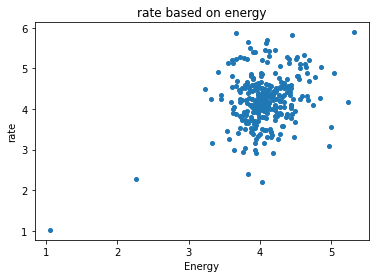

In [23]:
y = np.mean(rate, axis=1)
x = np.mean(energy, axis=1)
plt.plot(x,y,'o',markersize=4) 

plt.xlabel('Energy')
plt.ylabel('rate')
plt.title('rate based on energy')
#plt.legend()

In [24]:
x = np.array(x).reshape(-1,1)
model = LinearRegression().fit(x,y)
b0, b1 = model.intercept_, model.coef_
b0,b1

(1.9991485860138005, array([0.54749206]))

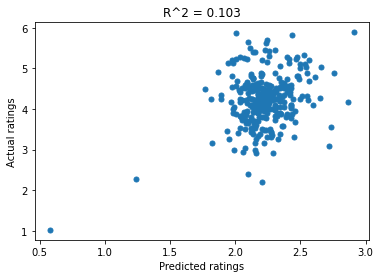

In [25]:
yHat = b1[0]*x[:,0]
plt.plot(yHat,y,'o',markersize=5)
plt.xlabel('Predicted ratings')
plt.ylabel('Actual ratings')
rSqr = model.score(x,y)
plt.title('R^2 = {:.3f}'.format(rSqr))
plt.show()

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x,               # X matrix
                                                    y,               # Y vector
                                                    test_size=0.20,  # percent of data in test
                                                    random_state=seed  # set random state 
                                                   )

regressor = LinearRegression().fit(x_train, y_train)   

print('Intercept', regressor.intercept_)        # Print the intercept
print('Coefficient', regressor.coef_)           # Print the coefficient

Intercept 1.776355345678529
Coefficient [0.60233973]


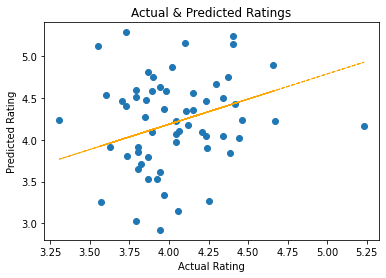

Root Mean Squared Error: 0.5532847578238594
R-squared -0.028111359369796363


In [27]:
y_pred = regressor.predict(x_test)

#plt.scatter(y_test, y_pred)
#plt.plot(y_test, y_test, color = 'skyblue', linestyle='--', linewidth=1)

plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color = 'orange', linestyle='--', linewidth=1)


plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')

plt.title('Actual & Predicted Ratings')
#plt.legend()
plt.show()

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-squared', metrics.r2_score(y_test, y_pred))

In [28]:
# 6) Build a regression model to predict art preference ratings from energy ratings and demographic information. Make sure to use cross-validation methods to avoid overfitting and comment on how well your model predicts relative to the “energy ratings only” model.

In [29]:
x = rate_energy_demographic.iloc[:,1:].values
y = rate_energy_demographic.iloc[:,:1].values
model = LinearRegression().fit(x,y)
b0, b1 = model.intercept_, model.coef_
b0, b1

(array([5.53728266]),
 array([[ 0.17810425, -0.09002415, -0.09178336, -0.04811588,  0.01579167,
          0.12976079, -0.16778859]]))

In [30]:
#x = np.array(x).reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.3,
                                                    random_state=seed)

regressor = LinearRegression()
regressor.fit(x_train, y_train)          

print('Intercept', regressor.intercept_)
print('Coefficient', regressor.coef_)

Intercept [6.28556553]
Coefficient [[ 0.0814783  -0.09754177 -0.22277014 -0.05800916  0.07680077  0.10353489
  -0.22117561]]


In [31]:
y_pred = regressor.predict(x_test) 
model.score(x_test,y_pred)

0.5668405482979331

In [32]:
model.score(x_test,y_test)

-0.0036424327341577634

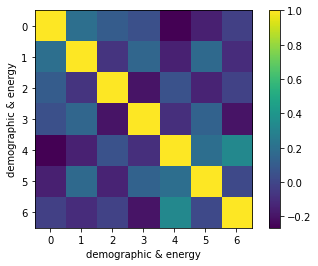

In [33]:
corrMatrix1 = np.corrcoef(x, rowvar = False)
# column-wise is appropirate to know how similar painting were answered.
plt.imshow(corrMatrix1)
plt.xlabel('demographic & energy')
plt.ylabel('demographic & energy')
plt.colorbar()

plt.show()

In [34]:
# 7) Considering the 2D space of average preference ratings vs. average energy rating (that contains the 91 art pieces as elements), how many clusters can you – algorithmically - identify in this space? Make sure to comment on the identity of the clusters – do they correspond to particular types of art?

In [35]:
energy_mean1 = np.array(energy_mean).reshape(-1,1)
energy_mean = pd.DataFrame(energy_mean)
#energy_mean1 = np.array(np.mean(energy)).reshape(-1,1)
scaler = StandardScaler().fit(energy_mean1)
x_scaled = scaler.transform(energy_mean1)
df_scaled = pd.DataFrame(x_scaled, columns = energy_mean.columns)

error = list()  # to save error

for k in range(1,10): 
    kmeans = KMeans(n_clusters=k) # init k-means object
    kmeans.fit(x_scaled)  # run k-means!
    
    error.append(kmeans.inertia_) # save sum of squared error (SSE)
kl = KneeLocator(range(1, 10), error, 
                 curve='convex', direction='decreasing')

print('The number of cluster is: ' + str(kl.elbow))

The number of cluster is: 4


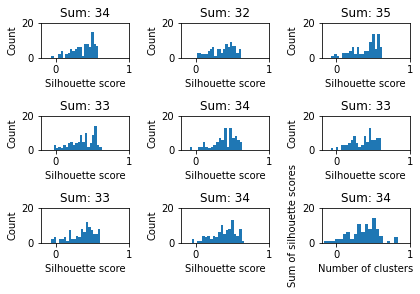

In [36]:
#x=energy_mean.to_numpy().reshape(-1,1)
energy_mean = np.mean(energy, axis=0)
rate_mean = np.mean(rate, axis=0)
x = np.column_stack((scale(rate_mean),scale(energy_mean)))
numClusters = 9 # how many clusters are we looping over? (from 2 to 10)
sSum = np.empty([numClusters,1])*np.NaN # init container to store sums

# Compute kMeans for each k:
for ii in range(2, numClusters+2): # Loop through each cluster (from 2 to 10)
    kMeans = KMeans(n_clusters = int(ii)).fit(x) # compute kmeans using scikit
    cId = kMeans.labels_ # vector of cluster IDs that the row belongs to
    cCoords = kMeans.cluster_centers_ # coordinate location for center of each cluster
    s = silhouette_samples(x,cId) # compute the mean silhouette coefficient of all samples
    sSum[ii-2] = sum(s) # take the sum
    # Plot data:
    plt.subplot(3,3,ii-1) 
    plt.hist(s,bins=20) 
    plt.xlim(-0.2,1)
    plt.ylim(0,20)
    plt.xlabel('Silhouette score')
    plt.ylabel('Count')
    plt.title('Sum: {}'.format(int(sSum[ii-2]))) # sum rounded to nearest integer
    plt.tight_layout() # adjusts subplot 

# Plot the sum of the silhouette scores as a function of the number of clusters, to make it clearer what is going on
plt.plot(np.linspace(2,numClusters,9),sSum)
plt.xlabel('Number of clusters')
plt.ylabel('Sum of silhouette scores')
plt.show()


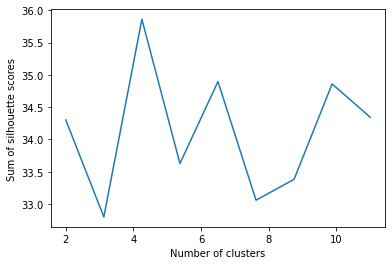

In [37]:
#
x=x.reshape(-1,1)
numClusters = 9
Q = np.empty([numClusters,1])*np.NaN 

# Compute kMeans:
for ii in range(2, 11):
    kMeans = KMeans(n_clusters = int(ii)).fit(x) 
    cId = kMeans.labels_ 
    cCoords = kMeans.cluster_centers_ 
    s = silhouette_samples(x,cId)
    Q[ii-2] = sum(s)
    
plt.plot(np.linspace(2,11,9),sSum)
plt.xlabel('Number of clusters')
plt.ylabel('Sum of silhouette scores')
plt.show()

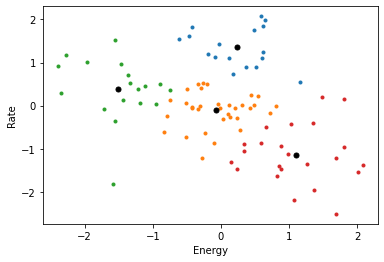

In [38]:
# kMeans:
ls = []
x = np.column_stack((scale(np.mean(rate, axis=0)),scale(np.mean(energy, axis=0))))
numClusters = 4
kMeans = KMeans(n_clusters = numClusters).fit(x) 
cId = kMeans.labels_ 
cCoords = kMeans.cluster_centers_ 

# Plot the color-coded data:
for ii in range(numClusters):
    plotIndex = np.argwhere(cId == int(ii))
    ls.append(x[plotIndex,:])
    plt.plot(x[plotIndex,0],x[plotIndex,1],'o',markersize=3)
    plt.plot(cCoords[int(ii-1),0],cCoords[int(ii-1),1],'o',markersize=5,color='black')  
    plt.xlabel('Energy')
    plt.ylabel('Rate')
    #plt.legend()
    

In [39]:
# 8) Considering only the first principal component of the self-image ratings as inputs to a regression model – how well can you predict art preference ratings from that factor alone?

In [40]:
rateimage = rate.join(image)
rateimage = rateimage.dropna()
rateimage = rateimage.iloc[:,0:91]
rateimage = rateimage.to_numpy()

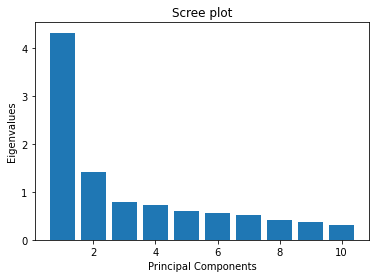

In [41]:
zscoredData = stats.zscore(image)
pca = PCA().fit(zscoredData)
eigVals = pca.explained_variance_
loadings = pca.components_*-1
origDataNewCoordinates = pca.fit_transform(zscoredData)*-1

numPredictors = 10
plt.bar(np.linspace(1,numPredictors,numPredictors),eigVals)
plt.title('Scree plot')
plt.xlabel('Principal Components')
plt.ylabel('Eigenvalues')
plt.show()

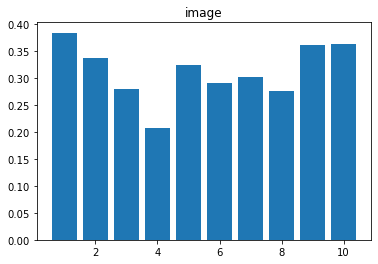

In [42]:
plt.bar(np.linspace(1,numPredictors,numPredictors),loadings[0,:])
plt.title('image')
plt.show()

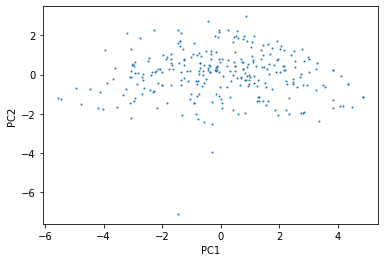

In [43]:
plt.plot(origDataNewCoordinates[:,0],origDataNewCoordinates[:,1],'o',markersize=1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [44]:
x = pca.fit_transform(rateimage)*-1
y=np.mean(rateimage,axis=1)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=seed) 

scaler_x_train = StandardScaler().fit(x_train)
scaler_x_test = StandardScaler().fit(x_test)

x_train_trans = scaler_x_train.transform(x_train)
x_test_trans = scaler_x_test.transform(x_test)

x_train_fit = pca.fit_transform(x_train_trans)*-1
x_test_fit = pca.transform(x_test_trans)*-1



In [45]:
x_train_inv = scaler_x_train.inverse_transform(x_train_fit)
x_train_fin = x_train_inv[:,:1]

x_test_inv = scaler_x_train.inverse_transform(x_test_fit)
x_test_fin = x_test_inv[:,:1]

model = LinearRegression().fit(x_train_fin, y_train)

RMSE = mean_squared_error(y_train, model.predict(x_train_fin), 
                          squared = False)
print('RMSE:'+str(RMSE))


RMSE:0.6487406612566566


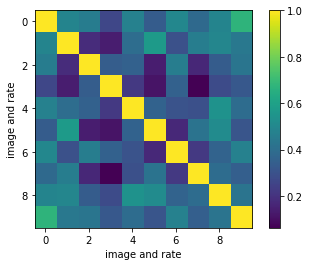

In [46]:
corrMatrix1 = np.corrcoef(image, rowvar = False)
# column-wise is appropirate to know how similar painting were answered.
plt.imshow(corrMatrix1)
plt.xlabel('image and rate')
plt.ylabel('image and rate')
plt.colorbar()

plt.show()

In [47]:
model.score(x_test_fin,y_test)

-0.05925153114333681

In [48]:
# 9) Consider the first 3 principal components of the “dark personality” traits – use these as inputs to a regression model to predict art preference ratings. Which of these components significantly predict art preference ratings? Comment on the likely identity of these factors (e.g. narcissism, manipulativeness, callousness, etc.). 

In [49]:
dark = data.iloc[:,182:194].dropna()


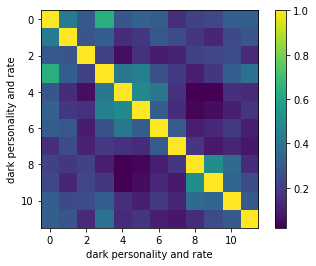

In [50]:
corrMatrix1 = np.corrcoef(dark, rowvar = False)
# column-wise is appropirate to know how similar painting were answered.
plt.imshow(corrMatrix1)
plt.xlabel('dark personality and rate')
plt.ylabel('dark personality and rate')
plt.colorbar()

plt.show()

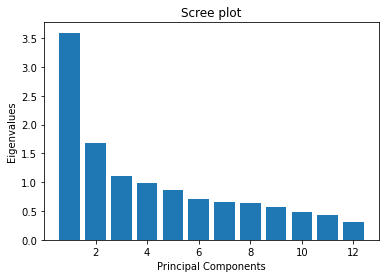

In [51]:
zscoredData = stats.zscore(dark)
pca = PCA().fit(zscoredData)
eigVals = pca.explained_variance_
loadings = pca.components_*-1
origDataNewCoordinates = pca.fit_transform(zscoredData)*-1
numPredictors = 12
plt.bar(np.linspace(1,numPredictors,numPredictors),eigVals)
plt.title('Scree plot')
plt.xlabel('Principal Components')
plt.ylabel('Eigenvalues')
plt.show()

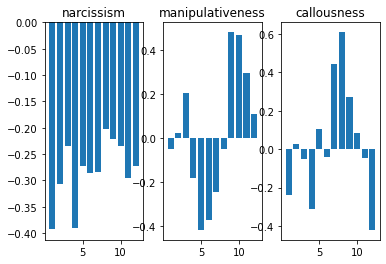

In [52]:
plt.subplot(1,3,1) # Factor 1: 
plt.bar(np.linspace(1,numPredictors,numPredictors),loadings[0,:]) # "Challenges"
plt.title('narcissism')
plt.subplot(1,3,2) # Factor 2:
plt.bar(np.linspace(1,numPredictors,numPredictors),loadings[1,:]) # "Support"
plt.title('manipulativeness')
plt.subplot(1,3,3)
plt.bar(np.linspace(1,numPredictors,numPredictors),loadings[2,:])
plt.title('callousness')
plt.show()

In [53]:
x = pca.fit_transform(dark)*-1
rate_dark = pd.concat([rate,dark],axis=1).dropna()
y=np.mean(rate_dark,axis=1)

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x,               # X matrix
                                                    y,               # Y vector
                                                    test_size=0.20,  # percent of data in test
                                                    random_state=seed  # set random state 
                                                   )

regressor = LinearRegression().fit(x_train, y_train)   

print('Intercept', regressor.intercept_)        # Print the intercept
print('Coefficient', regressor.coef_)           # Print the coefficient


Intercept 4.095911324257911
Coefficient [-0.02359469  0.04883483  0.06653795 -0.02195448 -0.00199663  0.05619765
 -0.02981349  0.14362701 -0.0368169  -0.09537507  0.01851114 -0.00539727]


In [55]:
#x = np.array(x).reshape(-1,1)
model = LinearRegression().fit(x,y)
b0, b1 = model.intercept_, model.coef_
b0, b1

(4.076917817585122,
 array([-0.0273342 ,  0.052767  ,  0.07162473, -0.00579222,  0.02043085,
         0.00227953, -0.03697892,  0.14005256, -0.05197097, -0.05967979,
         0.03862776, -0.02621807]))

In [56]:
RMSE = mean_squared_error(y_train, model.predict(x_train), 
                          squared = False)
RMSE

0.5111765563999069

In [57]:
#PC1
x_train,x_test,y_train,y_test = train_test_split(x,
                                                 y,
                                                 test_size=0.3,
                                                 random_state=seed) 

scaler_x_train = StandardScaler().fit(x_train)
scaler_x_test = StandardScaler().fit(x_test)

x_train_trans = scaler_x_train.transform(x_train)
x_test_trans = scaler_x_test.transform(x_test)

x_train_fit = pca.fit_transform(x_train_trans)*-1
x_test_fit = pca.transform(x_test_trans)*-1

x_train_inv = scaler_x_train.inverse_transform(x_train_fit)
x_train_fin = x_train_inv[:,0:1]

x_test_inv = scaler_x_train.inverse_transform(x_test_fit)
x_test_fin = x_test_inv[:,0:1]

model = LinearRegression().fit(x_train_fin, y_train)
b0, b1 = model.intercept_, model.coef_
RMSE = mean_squared_error(y_train, model.predict(x_train_fin), 
                          squared = False)
print('RMSE: '+str(RMSE))

RMSE: 0.5556023568032002


In [58]:
b0, b1

(4.0975555545224855, array([0.00549971]))

In [59]:
#PC2
x_train,x_test,y_train,y_test = train_test_split(x,
                                                 y,
                                                 test_size=0.3,
                                                 random_state=seed) 

scaler_x_train = StandardScaler().fit(x_train)
scaler_x_test = StandardScaler().fit(x_test)

x_train_trans = scaler_x_train.transform(x_train)
x_test_trans = scaler_x_test.transform(x_test)

x_train_fit = pca.fit_transform(x_train_trans)*-1
x_test_fit = pca.transform(x_test_trans)*-1

x_train_inv = scaler_x_train.inverse_transform(x_train_fit)
x_train_fin = x_train_inv[:,1:2]

x_test_inv = scaler_x_train.inverse_transform(x_test_fit)
x_test_fin = x_test_inv[:,1:2]

model = LinearRegression().fit(x_train_fin, y_train)
b0, b1 = model.intercept_, model.coef_
RMSE = mean_squared_error(y_train, model.predict(x_train_fin), 
                          squared = False)
print('RMSE: '+str(RMSE))

RMSE: 0.5517490294974274


In [60]:
b0, b1

(4.094033312438195, array([0.04282172]))

In [61]:
#PC3
x_train,x_test,y_train,y_test = train_test_split(x,
                                                 y,
                                                 test_size=0.3,
                                                 random_state=seed) 

scaler_x_train = StandardScaler().fit(x_train)
scaler_x_test = StandardScaler().fit(x_test)

x_train_trans = scaler_x_train.transform(x_train)
x_test_trans = scaler_x_test.transform(x_test)

x_train_fit = pca.fit_transform(x_train_trans)*-1
x_test_fit = pca.transform(x_test_trans)*-1

x_train_inv = scaler_x_train.inverse_transform(x_train_fit)
x_train_fin = x_train_inv[:,2:3]

x_test_inv = scaler_x_train.inverse_transform(x_test_fit)
x_test_fin = x_test_inv[:,2:3]

model = LinearRegression().fit(x_train_fin, y_train)
b0, b1 = model.intercept_, model.coef_
RMSE = mean_squared_error(y_train, model.predict(x_train_fin), 
                          squared = False)
print('RMSE: '+str(RMSE))

RMSE: 0.553254884171123


In [62]:
b0, b1

(4.10164831841852, array([0.03937008]))

In [63]:
x=dark
y=rate_dark


x_train, x_test, y_train, y_test = train_test_split(x,               # X matrix
                                                    y,               # Y vector
                                                    test_size=0.20,  # percent of data in test
                                                    random_state=seed  # set random state 
                                                   )

regressor = LinearRegression().fit(x_train, y_train)   

#print('Intercept', regressor.intercept_)# Print the intercept
#print('Coefficient', regressor.coef_)   # Print the coefficient


model = LinearRegression().fit(x,y)
b0, b1 = model.intercept_, model.coef_

RMSE = mean_squared_error(y_train, model.predict(x_train), 
                          squared = False)
RMSE


1.2405290935458382

In [64]:
# 10) Can you determine the political orientation of the users (to simplify things and avoid gross class imbalance issues, you can consider just 2 classes: “left” (progressive & liberal) vs. “nonleft” (everyone else)) from all the other information available, using any classification model of your choice? Make sure to comment on the classification quality of this model. 

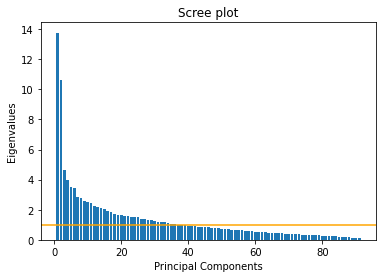

In [65]:
energy_predictor = pd.DataFrame(data.loc[:,91:181])
x = energy_predictor.to_numpy()
zscoredData = stats.zscore(energy_predictor)
pca = PCA().fit(energy_predictor)
eigVals = pca.explained_variance_

loadings = pca.components_*-1
origDataNewCoordinates = pca.fit_transform(energy_predictor)*-1
# Scree plot:
numPredictors = 91
plt.bar(np.linspace(1,numPredictors,numPredictors),eigVals)
plt.title('Scree plot')
plt.axhline(y = 1, color = 'orange', linestyle = '-')
plt.xlabel('Principal Components')
plt.ylabel('Eigenvalues')
plt.show()

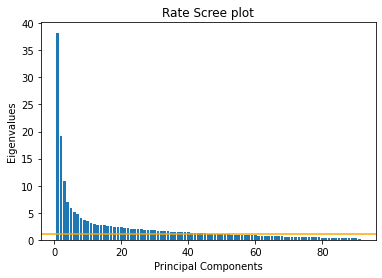

In [66]:
rate_predictor = pd.DataFrame(rate.loc[:,0:90])
x = rate_predictor.to_numpy()
zscoredData = stats.zscore(rate_predictor)
pca = PCA().fit(rate_predictor)
eigVals = pca.explained_variance_

loadings = pca.components_*-1
origDataNewCoordinates = pca.fit_transform(rate_predictor)*-1
# Scree plot:
numPredictors = 91
plt.bar(np.linspace(1,numPredictors,numPredictors),eigVals)
plt.title('Rate Scree plot')
plt.axhline(y = 1, color = 'orange', linestyle = '-')
plt.xlabel('Principal Components')
plt.ylabel('Eigenvalues')
plt.show()

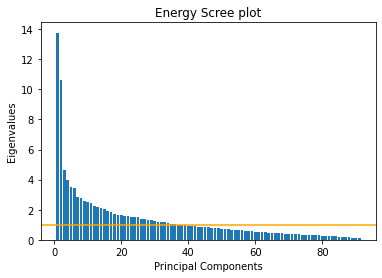

In [67]:
energy_predictor = pd.DataFrame(data.loc[:,91:181])
x = energy_predictor.to_numpy()
zscoredData = stats.zscore(energy_predictor)
pca = PCA().fit(energy_predictor)
eigVals = pca.explained_variance_

loadings = pca.components_*-1
origDataNewCoordinates = pca.fit_transform(energy_predictor)*-1
# Scree plot:
numPredictors = 91
plt.bar(np.linspace(1,numPredictors,numPredictors),eigVals)
plt.title('Energy Scree plot')
plt.axhline(y = 1, color = 'orange', linestyle = '-')
plt.xlabel('Principal Components')
plt.ylabel('Eigenvalues')
plt.show()

In [68]:
data_drop = data.dropna()
data_drop = data_drop.iloc[:,0:217].to_numpy()

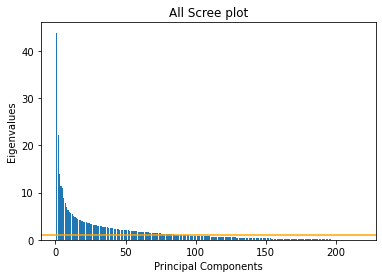

In [69]:
zscoredData = stats.zscore(data_drop)
pca = PCA().fit(data_drop)
eigVals = pca.explained_variance_

loadings = pca.components_*-1
origDataNewCoordinates = pca.fit_transform(data_drop)*-1
#Scree plot:
numPredictors = 217
plt.bar(np.linspace(1,numPredictors,numPredictors),eigVals,align = 'center')
plt.title('All Scree plot')
plt.axhline(y = 1, color = 'orange', linestyle = '-')
plt.xlabel('Principal Components')
plt.ylabel('Eigenvalues')
plt.show()


In [70]:
x = energy_predictor.to_numpy()
y = political2





x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=seed) 

scaler_x_train = StandardScaler().fit(x_train)
scaler_x_test = StandardScaler().fit(x_test)

x_train_trans = scaler_x_train.transform(x_train)
x_test_trans = scaler_x_test.transform(x_test)

x_train_fit = pca.fit_transform(x_train_trans)*-1
x_test_fit = pca.transform(x_test_trans)*-1



In [71]:

x_train_inv = scaler_x_train.inverse_transform(x_train_fit)
x_train_fin = x_train_inv[:,:20]

x_test_inv = scaler_x_train.inverse_transform(x_test_fit)
x_test_fin = x_test_inv[:,:20]

In [72]:
model = LogisticRegression()
model.fit(x_train_fin, y_train)

LogisticRegression()

In [73]:
model.score(x_train_fin,y_train)

0.6333333333333333

In [74]:
model.score(x_test_fin,y_test)

0.6222222222222222

In [75]:
RMSE = mean_squared_error(y_train, model.predict(x_train_fin), 
                          squared = False)
RMSE

0.6055300708194983